In [1]:
%matplotlib inline
import pandas as pd

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [2]:
titles = pd.DataFrame.from_csv('data/titles.csv', index_col=None)
titles.head()

,title,year
0,The Rising Son,1990
1,Ashes of Kukulcan,2016
2,The Thousand Plane Raid,1969
3,Crucea de piatra,1993
4,Country,2000


In [3]:
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22
1,Gangsta Rap: The Glockumentary,2007,Too $hort,actor,Himself,NaN
2,Menace II Society,1993,Too $hort,actor,Lew-Loc,27
3,Porndogs: The Adventures of Sadie,2009,Too $hort,actor,Bosco,3
4,Stop Pepper Palmer,2014,Too $hort,actor,Himself,NaN


### Using groupby(), plot the number of films that have been released each decade in the history of cinema.

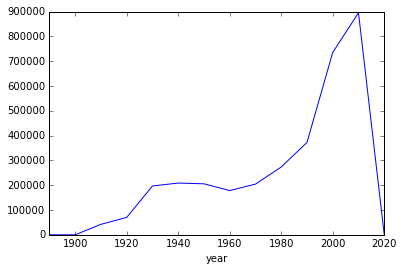

In [65]:
c = cast
c.groupby([c.year // 10 * 10]).size().plot();

### Use groupby() to plot the number of "Hamlet" films made each decade.

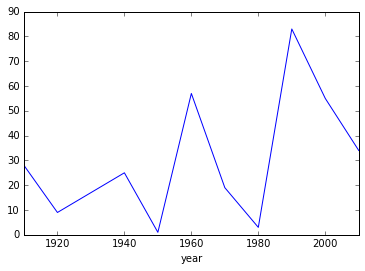

In [74]:
c = cast
c = c[c.title == 'Hamlet']
c.groupby([c.year // 10 * 10]).size().plot();

### How many leading (n=1) roles were available to actors, and how many to actresses, in each year of the 1950s?

In [79]:
c = cast
c = c[c.n == 1]
c = c.groupby('type').size()
c

type
actor      96600
actress    42774
dtype: int64

### In the 1950s decade taken as a whole, how many total roles were available to actors, and how many to actresses, for each "n" number 1 through 5?

In [81]:
c = cast
c = c[(c.year >= 1950) & (c.year < 1960) & (c.n >= 1) & (c.n <= 5)]
c.groupby('n').size()

n
1    9291
2    8869
3    8510
4    8223
5    7945
dtype: int64

### Use groupby() to determine how many roles are listed for each of the Pink Panther movies.

In [90]:
c = cast
c = c[c.title == 'The Pink Panther']
c.groupby('year').size()

year
1963    19
2006    89
2016     1
dtype: int64

### List, in order by year, each of the films in which Frank Oz has played more than 1 role.

In [129]:
c = cast
c = c[c.name == 'Frank Oz']
c = c.groupby(['year', 'title']).size()
c[c > 1]

year  title                                   
1979  The Muppet Movie                            8
1981  An American Werewolf in London              2
      The Great Muppet Caper                      6
1982  The Dark Crystal                            2
1984  The Muppets Take Manhattan                  7
1985  Sesame Street Presents: Follow that Bird    3
1992  The Muppet Christmas Carol                  7
1996  Muppet Treasure Island                      4
1999  Muppets from Space                          4
      The Adventures of Elmo in Grouchland        3
dtype: int64

### List each of the characters that Frank Oz has portrayed at least twice.

In [133]:
c = cast
c = c[c.name == 'Frank Oz']
c = c.groupby('character').size()
c[c > 1]

character
Animal            6
Bert              3
Cookie Monster    3
Fozzie Bear       4
Grover            2
Miss Piggy        6
Sam the Eagle     5
Yoda              6
dtype: int64

In [8]:
%%time
cast[cast.title == 'Sleuth']

CPU times: user 198 ms, sys: 2.79 ms, total: 201 ms
Wall time: 205 ms


,title,year,name,type,character,n
233918,Sleuth,2007,Kenneth Branagh,actor,Other Man on T.V.,NaN
294810,Sleuth,1972,Michael Caine,actor,Milo Tindle,2
294811,Sleuth,2007,Michael Caine,actor,Andrew,1
337756,Sleuth,1972,Alec Cawthorne,actor,Inspector Doppler,3
337757,Sleuth,2007,Alec (II) Cawthorne,actor,Inspector Doppler,NaN
1171232,Sleuth,2007,Jude Law,actor,Milo,2
1312188,Sleuth,1972,Teddy Martin,actor,Police Constable Higgs,6
1327177,Sleuth,1972,John (II) Matthews,actor,Detective Sergeant Tarrant,4
1545047,Sleuth,1972,Laurence Olivier,actor,Andrew Wyke,1
1635645,Sleuth,2007,Harold Pinter,actor,Man on T.V.,3


In [10]:
c = cast.set_index(['title'])
c.head()

,year,name,type,character,n
title,,,,,
Suuri illusioni,1985,Homo $,actor,Guests,22
Gangsta Rap: The Glockumentary,2007,Too $hort,actor,Himself,NaN
Menace II Society,1993,Too $hort,actor,Lew-Loc,27
Porndogs: The Adventures of Sadie,2009,Too $hort,actor,Bosco,3
Stop Pepper Palmer,2014,Too $hort,actor,Himself,NaN


In [22]:
c = cast.set_index(['title', 'year']).sort_index()
c.head()

name   type               character   n
title            year                                                      
#1 Serial Killer 2013      Michael Alton  actor       Detective Roberts  17
                 2013         Aaron Aoki  actor      Plastic Bag Victim  21
                 2013  Zachary (X) Brown  actor  Africian American Teen  18
                 2013     Yvis Cannavale  actor            Homeless Man  25
                 2013      Patrick Chien  actor          Cleaver Victim  22

In [30]:
%%time
c.loc['Sleuth', 1972]

CPU times: user 115 ms, sys: 68.4 ms, total: 183 ms
Wall time: 187 ms


name     type                   character  n
title  year                                                            
Sleuth 1972       Michael Caine    actor                 Milo Tindle  2
       1972      Alec Cawthorne    actor           Inspector Doppler  3
       1972        Teddy Martin    actor      Police Constable Higgs  6
       1972  John (II) Matthews    actor  Detective Sergeant Tarrant  4
       1972    Laurence Olivier    actor                 Andrew Wyke  1
       1972  Eve (III) Channing  actress             Marguerite Wyke  5

In [44]:
%%time
c.loc[('Sleuth', 1972)].reset_index(['year', 'title'])

CPU times: user 30.5 ms, sys: 20.9 ms, total: 51.4 ms
Wall time: 51.4 ms


,title,year,name,type,character,n
0,Sleuth,1972,Michael Caine,actor,Milo Tindle,2
1,Sleuth,1972,Alec Cawthorne,actor,Inspector Doppler,3
2,Sleuth,1972,Teddy Martin,actor,Police Constable Higgs,6
3,Sleuth,1972,John (II) Matthews,actor,Detective Sergeant Tarrant,4
4,Sleuth,1972,Laurence Olivier,actor,Andrew Wyke,1
5,Sleuth,1972,Eve (III) Channing,actress,Marguerite Wyke,5


In [46]:
# Groupby

c = cast
c = c[c.name == 'George Clooney']
c.groupby(['title', 'year', 'character']).size()

title                              year  character               
A Very Murray Christmas            2015  George Clooney              1
Batman & Robin                     1997  Batman                      1
                                         Bruce Wayne                 1
Burn After Reading                 2008  Harry Pfarrer               1
Confessions of a Dangerous Mind    2002  Jim Byrd                    1
Curdled                            1996  Seth Gecko                  1
Fantastic Mr. Fox                  2009  Mr. Fox                     1
From Dusk Till Dawn                1996  Seth Gecko                  1
Good Night, and Good Luck.         2005  Fred Friendly               1
Gravity                            2013  Matt Kowalski               1
Hail, Caesar!                      2016  Baird Whitlock              1
Intolerable Cruelty                2003  Miles                       1
Leatherheads                       2008  Dodge Connelly              1
Michael Cla

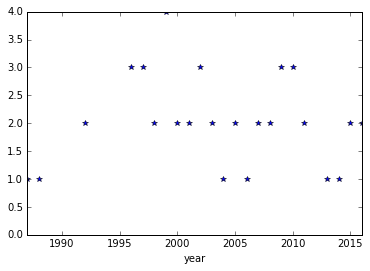

In [50]:
c = cast
c = c[c.name == 'George Clooney']
c.groupby(['year',]).size().plot(ylim=0, style='*');

In [55]:
c = cast
c = c[c.name == 'George Clooney']
c.groupby(['name']).n.median()

name
George Clooney    2
Name: n, dtype: float64

In [56]:
c = cast
c = c[c.name == 'George Clooney']
c.groupby([c.year // 10 * 10]).n.size()

year
1980     2
1990    14
2000    20
2010    11
dtype: int64